# Задание №4.c - Обучение нейросетевых регрессора и классификаторов

Цель работы – получить навыки создания полносвязного бинарного и многоклассового классификаторов, а также нейросетевого регрессора с помощью библиотеки построения нейронных сетей.
Задачи – Построить три нейросетевые модели:

a) Бинарный Классификатор

b) Многоклассовый классификатор

c) Регрессор


Выполнить загрузку и предварительную обработку данных из наборов. Разделить каждую выборку на обучающую, тестовую и валидационную. Произвести обучение набора нейросетевых архитектур, отличающихся разным набором параметров: число слоёв, количество нейронов в слоях, функции активации в слоях, процедур оптимизации:

-	Подобрать архитектуры нейронных сетей, которые с одной стороны позволяют получить модели с лучшими метриками качества работы, с другой стороны не являются избыточными и не переобученными.

-	Вычислить следующие метрики работы:

    1. Для бинарного классификатора: Recall, Precision, Weighted Accuracy, AUC для всех исследованных моделей.

    2. Для многоклассового классификатора: Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе.

    3. Для регрессора: MSE, MAE, R2 для всех полученных моделей.

    4. Сделать выводы по результатам построения моделей.

Описание отчета.
1. Описание наборов данных.
2. Признаки, которые были использованы для анализа.
2. Параметры архитектур и обучения нейронных сетей, использованные для обучения.
3. Графики обучения для архитектур нейронных сетей с лучшими характеристиками эффективности

## Variant - even
a)	Оценка вероятности, того, что клиент откроет банковский депозит в результате маркетинговой акции:  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing Класс: атрибут 21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no').

b)	Оценка здоровья внутриутробного развития плода: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification Метка класса: fetal_health.

c)	Оценка уровня потребления ресурсов домохозяйством. Набор данных DS_2019_public.csv. Описание атрибутов – файл recs2009_public_codebook.xlsx. Предсказываемый признак – один из атрибутов (использовать только один из): TOTALBTU, TOTALBTUSPH, TOTALBTUCOL, TOTALBTUWTH, TOTALBTURFG, TOTALBTUOTH (Примечание BTU – Британская тепловая единица BTU ≈ 252 калории).


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('../data/ml-lab4/cancer patient data sets.xlsx')
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
df.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

In [8]:
df = df.drop('Patient Id', axis=1)

In [10]:
X = df.drop('Level', axis=1)
y = df['Level']

Будем предсказывать значение уровня в виде числа с плавающей точкой

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_features = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
models_params = [
    {'layers': [32], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': [128, 64, 32], 'activation': 'tanh', 'optimizer': 'sgd'},
    {'layers': [64], 'activation': 'elu', 'optimizer': 'adam'}
]

In [14]:
input_dim = X_train.shape[1]
trained_models = []

In [15]:
from modules.ml.c import build_model
from tensorflow.keras.callbacks import EarlyStopping

for params in models_params:
    model = build_model(input_dim, **params)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=0)
    trained_models.append((model, history))

2025-05-28 19:16:17.206697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748459777.225503   18077 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748459777.231244   18077 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748459777.248973   18077 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748459777.249015   18077 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748459777.249019   18077 computation_placer.cc:177] computation placer alr

In [16]:
trained_models

[(<Sequential name=sequential, built=True>,
  <keras.src.callbacks.history.History at 0x7f11410e8ef0>),
 (<Sequential name=sequential_1, built=True>,
  <keras.src.callbacks.history.History at 0x7f1140ea5310>),
 (<Sequential name=sequential_2, built=True>,
  <keras.src.callbacks.history.History at 0x7f110218d820>),
 (<Sequential name=sequential_3, built=True>,
  <keras.src.callbacks.history.History at 0x7f10fbf95820>)]

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compute_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [18]:
results = []
for i, (model, _) in enumerate(trained_models):
    mse, mae, r2 = compute_metrics(model, X_test, y_test)
    results.append({
        'Model': f'Model {i+1}',
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2', ascending=False))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f10b831de40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
     Model       MSE       MAE        R2
0  Model 1  0.000300  0.008440  0.999596
3  M

In [19]:
best_idx = results_df['R2'].idxmax()
best_idx

0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


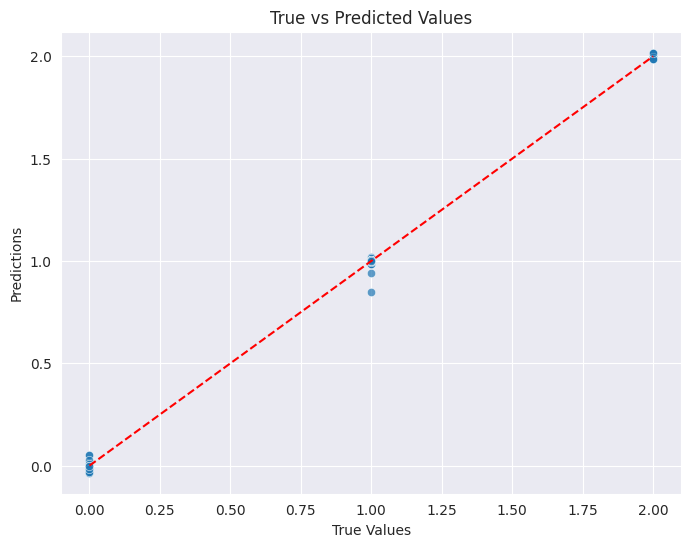

In [21]:
best_model = trained_models[results_df['R2'].idxmax()]
y_pred = best_model[0].predict(X_test).flatten()

# График истинных vs предсказанных значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [25]:
def plot_training_history(model_histories, model_names):
    plt.figure(figsize=(14, 6))

    # График потерь (loss)
    plt.subplot(1, 2, 1)
    for i, (history, name) in enumerate(zip(model_histories, model_names)):
        epochs = range(1, len(history.history['loss']) + 1)
        plt.plot(epochs, history.history['loss'], label=f'Train {name}', linestyle='--')
        plt.plot(epochs, history.history['val_loss'], label=f'Val {name}')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # График точности (accuracy)
    plt.subplot(1, 2, 2)
    for i, (history, name) in enumerate(zip(model_histories, model_names)):
        epochs = range(1, len(history.history['mae']) + 1)
        plt.plot(epochs, history.history['mae'], label=f'Train {name}', linestyle='--')
        plt.plot(epochs, history.history['val_mae'], label=f'Val {name}')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [26]:
top_models = results_df.sort_values(by='R2', ascending=False).head(2)
top_indices = top_models.index.tolist()
top_indices

[0, 3]

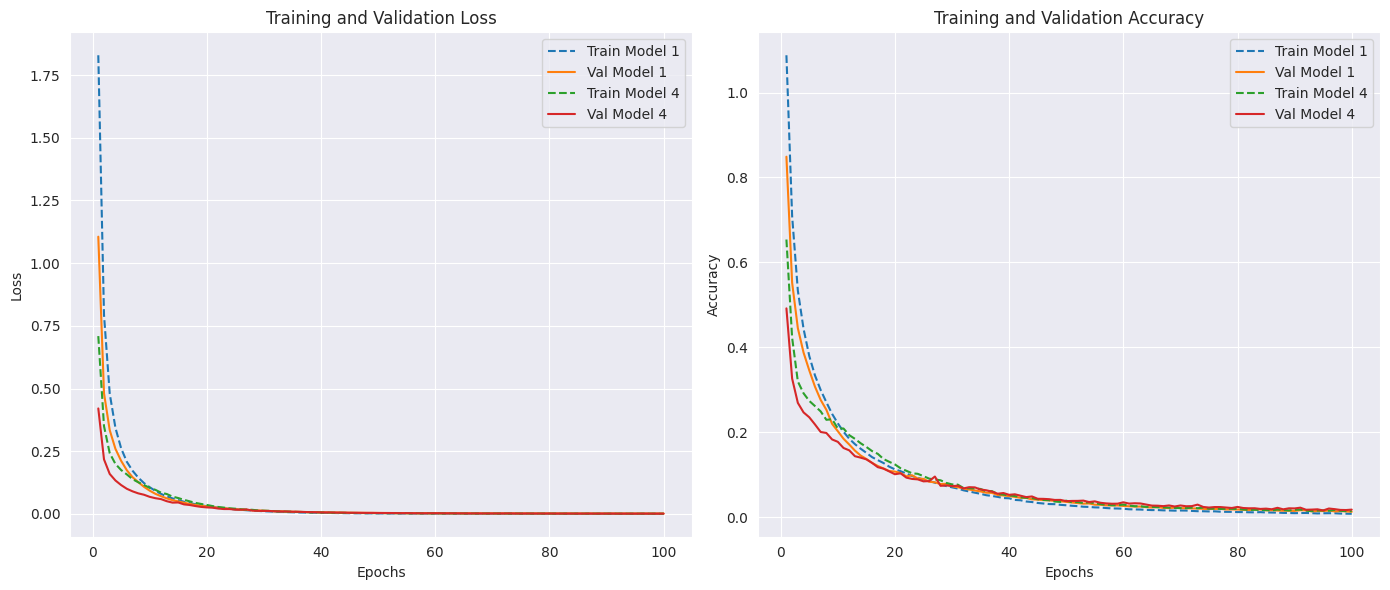

In [27]:
top_histories = [trained_models[i][1] for i in top_indices]
top_names = [f"Model {i+1}" for i in top_indices]

plot_training_history(top_histories, top_names)

In [28]:
models_params[best_idx]

{'layers': [32], 'activation': 'relu', 'optimizer': 'adam'}

Mодель с такими параметрами имеет лучший результат